In [45]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
movie_df = pd.read_csv('data/movies_merged.csv')

#movie_df = movie_df[movie_df['country'].str.contains("USA")]
#movie_df = movie_df[pd.to_numeric(movie_df['usa_gross_income'], errors='coerce').notnull()]
#movie_df = movie_df[pd.to_numeric(movie_df['budget'], errors='coerce').notnull()]
movie_df["Profit"] = movie_df["Revenue"] - movie_df["Budget"]
movie_df["Year"] = movie_df['Release Date'].str.split('[-]',expand=True,regex=True)[0].astype(int)
movie_df = movie_df[(movie_df["Year"]>=2000) & (movie_df["Year"]<=2020)]
#movie_df.head()
movie_df.head()

,Unnamed: 0,Revenue,Release Date,Runtime,Original Title,IMDB_ID,ID.1,Popularity,Vote Average,Budget,Genre List,Vote Count,Profit,Year
0,0,429632142,2000-12-22,143,Cast Away,tt0162222,8358,50.864,7.656,90000000,"[['Adventure', 'Drama']]",10100,339632142,2000
1,1,278019771,2000-07-07,88,Scary Movie,tt0175142,4247,134.378,6.324,19000000,[['Comedy']],6062,259019771,2000
2,2,345823040,2000-11-15,104,How the Grinch Stole Christmas,tt0170016,8871,62.037,6.746,123000000,"[['Family', 'Comedy', 'Fantasy']]",6479,222823040,2000
3,3,374111707,2000-12-15,127,What Women Want,tt0207201,3981,31.618,6.422,70000000,"[['Comedy', 'Romance']]",3463,304111707,2000
4,4,330444045,2000-10-06,108,Meet the Parents,tt0212338,1597,26.050,6.669,55000000,"[['Comedy', 'Romance']]",5306,275444045,2000


In [47]:
genre_df = movie_df[{ "Year", "Genre List", "Vote Average", "Profit"}].copy()
genre_df.head()

/var/folders/n3/0fjc3g9d04gb6vgxphygsqj80000gn/T/ipykernel_80770/4194962468.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  genre_df = movie_df[{ "Year", "Genre List", "Vote Average", "Profit"}].copy()


,Vote Average,Year,Genre List,Profit
0,7.656,2000,"[['Adventure', 'Drama']]",339632142
1,6.324,2000,[['Comedy']],259019771
2,6.746,2000,"[['Family', 'Comedy', 'Fantasy']]",222823040
3,6.422,2000,"[['Comedy', 'Romance']]",304111707
4,6.669,2000,"[['Comedy', 'Romance']]",275444045


In [48]:
def find_genre_profit(df, genre):
    temp_df = df[df['Genre List'].str.contains(genre)]
    profit = temp_df.groupby("Year").agg({"Profit": "mean"})["Profit"]
    return profit.values

def find_genre_vote(df, genre):
    temp_df = df[df['Genre List'].str.contains(genre)]
    profit = temp_df.groupby("Year").agg({"Vote Average": "mean"})["Vote Average"]
    return profit.values

def find_genre_count(df, genre):
    temp_df = df[df['Genre List'].str.contains(genre)]
    count = temp_df.groupby("Year").agg({"Profit": "count"})["Profit"]
    return count.values

genres = ["Animation", "Action", "Biography", "Crime", "Adventure", "Mystery", "Music", "Fantasy", "Romance", "Family", "Thriller", "Sci-Fi", "Music", "Drama", "Horror", "Comedy", "History"]

In [49]:
genre_profit_df = pd.DataFrame({"year": range(2000, 2021)})
for genre in genres:
    genre_profit = find_genre_profit(genre_df, genre)
    if(len(genre_profit)==21):
        genre_profit_df[f"Profit in {genre}"] = genre_profit

genre_profit_df

,year,Profit in Action,Profit in Crime,Profit in Adventure,Profit in Mystery,Profit in Fantasy,Profit in Romance,Profit in Family,Profit in Thriller,Profit in Drama,Profit in Horror,Profit in Comedy,Profit in History
0,2000,6.741593e+07,2.939877e+07,9.633091e+07,3.178322e+07,3.058966e+07,4.367954e+07,6.460358e+07,3.730103e+07,3.373660e+07,2.824222e+07,5.017491e+07,2.362036e+07
1,2001,7.587068e+07,4.236364e+07,1.464386e+08,3.728523e+07,2.069232e+08,5.399879e+07,1.406282e+08,4.879717e+07,3.683778e+07,3.676400e+07,4.575711e+07,1.397290e+08
2,2002,7.593542e+07,4.410965e+07,1.345335e+08,6.501991e+07,1.535163e+08,3.989533e+07,5.752103e+07,3.877705e+07,4.154657e+07,2.378724e+07,4.451436e+07,1.193759e+07
3,2003,1.123888e+08,3.536258e+07,1.255634e+08,4.450204e+07,1.616480e+08,3.486182e+07,1.052756e+08,6.061267e+07,2.992573e+07,3.673284e+07,5.391047e+07,6.309002e+06
4,2004,1.041171e+08,4.166726e+07,1.423206e+08,3.925979e+07,1.719570e+08,5.576067e+07,1.210900e+08,5.555081e+07,2.917907e+07,4.995231e+07,5.101470e+07,1.136804e+08
5,2005,5.268659e+07,3.742809e+07,1.068445e+08,3.276597e+07,1.123307e+08,6.706290e+07,1.196130e+08,3.558681e+07,3.818080e+07,4.343889e+07,4.814941e+07,3.958668e+07
6,2006,9.545691e+07,3.837651e+07,1.368857e+08,5.907675e+07,1.144482e+08,3.087005e+07,1.046068e+08,6.420868e+07,2.688612e+07,3.331464e+07,6.399143e+07,1.443175e+07
7,2007,1.309103e+08,3.581974e+07,2.147185e+08,1.023864e+08,1.906881e+08,4.296149e+07,1.537505e+08,5.346999e+07,3.556527e+07,4.054910e+07,6.832030e+07,3.064563e+07
8,2008,1.217914e+08,8.354307e+07,1.229518e+08,2.303073e+07,1.106124e+08,9.953599e+07,1.178769e+08,7.917855e+07,5.809360e+07,1.869463e+07,6.703399e+07,2.758506e+07
9,2009,1.679534e+08,3.131566e+07,3.745262e+08,5.906225e+07,3.677416e+08,6.458335e+07,1.449695e+08,3.883680e+07,4.030776e+07,3.821770e+07,7.120370e+07,3.322492e+07


In [50]:
genre_vote_df = pd.DataFrame({"year": range(2000, 2021)})
for genre in genres:
    genre_vote = find_genre_vote(genre_df, genre)
    if(len(genre_vote)==21):
        genre_vote_df[f"Avg Vote for {genre}"] = genre_vote

genre_vote_df

,year,Avg Vote for Action,Avg Vote for Crime,Avg Vote for Adventure,Avg Vote for Mystery,Avg Vote for Fantasy,Avg Vote for Romance,Avg Vote for Family,Avg Vote for Thriller,Avg Vote for Drama,Avg Vote for Horror,Avg Vote for Comedy,Avg Vote for History
0,2000,5.886308,6.238038,6.144947,6.137833,6.024833,6.055636,6.315615,6.214792,6.563109,5.993778,6.135706,6.787333
1,2001,6.218167,6.346576,6.291619,6.521562,6.383538,6.204805,6.482400,6.400711,6.752078,6.013857,5.993559,7.230667
2,2002,6.108816,6.428400,6.307586,6.457765,6.623615,6.346690,6.321294,6.160820,6.626781,5.800533,6.046594,6.937667
3,2003,6.258568,6.383889,6.411226,6.279300,6.434176,6.041500,6.326842,6.221622,6.525224,5.726000,5.992738,6.688857
4,2004,6.348043,6.193750,6.371846,6.174308,6.234818,6.433425,6.079778,6.300152,6.542456,5.901083,6.081429,6.592250
5,2005,6.306075,6.565840,6.470917,6.318600,6.481043,6.712974,6.175217,6.453638,6.746167,5.685955,6.209924,7.248750
6,2006,6.358788,6.409423,6.271481,6.177562,6.411556,6.305343,6.087615,6.246292,6.624902,5.679632,6.151103,6.548500
7,2007,6.186129,6.540103,6.314913,6.408143,6.215478,6.365545,6.380850,6.310755,6.626488,6.003091,6.128239,6.439333
8,2008,6.283522,6.414000,6.168600,6.100769,6.238450,6.375622,6.222316,6.193190,6.585889,5.911437,5.951701,7.044250
9,2009,6.074278,6.087455,6.522429,6.127833,6.756296,6.400447,6.444682,6.020325,6.535452,6.007778,6.155308,7.105000


In [51]:
genre_count_df = pd.DataFrame({"year": range(2000, 2021)})
for genre in genres:
    genre_count = find_genre_count(genre_df, genre)
    if(len(genre_count)==21):
        genre_count_df[f"Count of {genre}"] = genre_count
    
genre_count_df

,year,Count of Action,Count of Crime,Count of Adventure,Count of Mystery,Count of Fantasy,Count of Romance,Count of Family,Count of Thriller,Count of Drama,Count of Horror,Count of Comedy,Count of History
0,2000,26,26,19,18,12,22,13,48,64,18,51,3
1,2001,36,33,21,16,13,41,10,38,51,7,59,3
2,2002,38,30,29,17,13,29,17,50,73,15,64,6
3,2003,44,27,31,10,17,30,19,37,58,13,61,7
4,2004,46,20,26,13,11,40,18,33,57,12,70,4
5,2005,40,25,36,15,23,39,23,47,72,22,66,8
6,2006,33,26,27,16,18,35,26,48,82,19,68,10
7,2007,31,29,23,21,23,33,20,53,80,22,67,3
8,2008,46,26,35,13,20,37,19,42,81,16,67,8
9,2009,36,22,35,18,27,38,22,40,62,18,65,3


Text(0, 0.5, 'Profit (e8)')

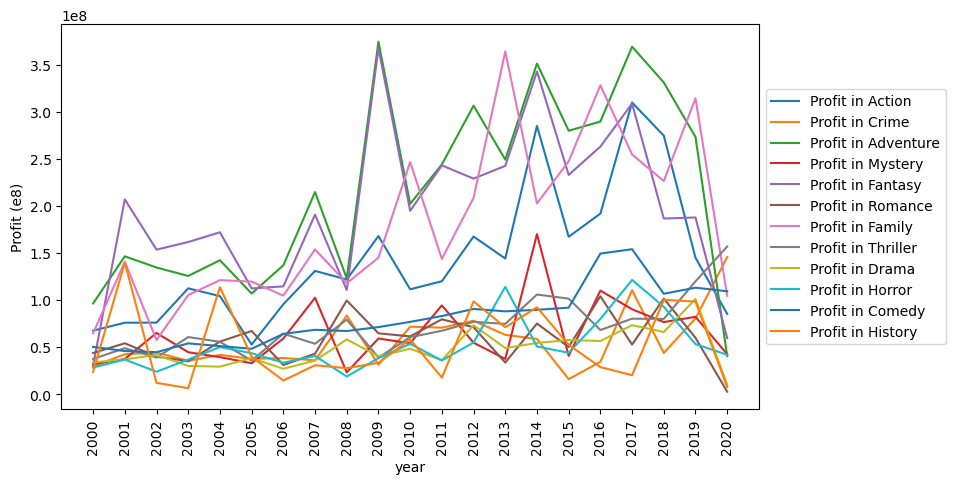

In [52]:
profit_cols = list(genre_profit_df.loc[:, genre_profit_df.columns != 'year'])
ax1 = genre_profit_df.plot.line(x="year", y=profit_cols, figsize=(9,5))
ax1.set_xticks(genre_profit_df["year"].values);
ax1.set_xticklabels(genre_profit_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Profit (e8)')

**Analysis**
From the above chart we can see some the genres makes more profit than others over the year. As example, 
- Adventure, Fantasy, Family and Action Movies always made more money than other types of movies like History or Horror.
- Also, interstingly in 2020, all movies COVID, except crime and Thriller.

Text(0, 0.5, 'Avg Vote')

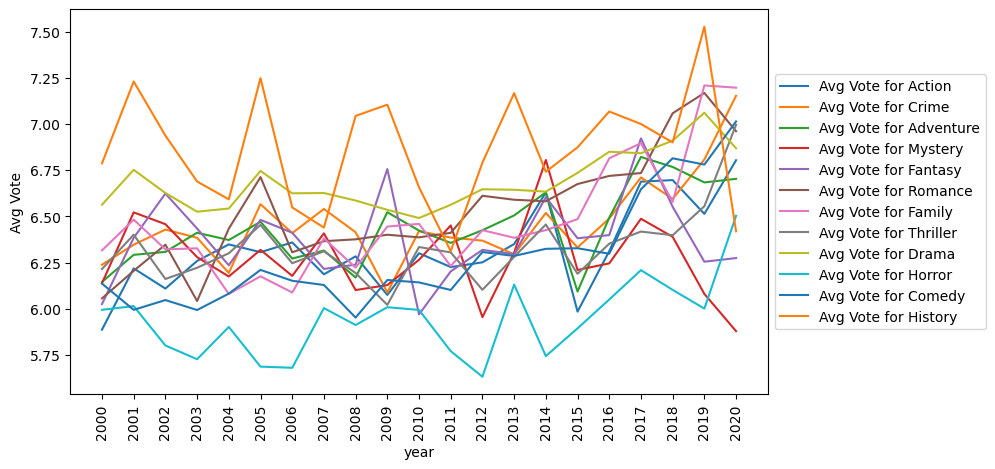

In [53]:
vote_cols = list(genre_vote_df.loc[:, genre_vote_df.columns != 'year'])
ax1 = genre_vote_df.plot.line(x="year", y=vote_cols, figsize=(9,5))
ax1.set_xticks(genre_vote_df["year"].values);
ax1.set_xticklabels(genre_vote_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Avg Vote')

**Analysis**
From the above chart we can see some the genres are more popular than others over the year. As example, 
- History Movies always got a better votes from audiance but its not consistent. 
- Drama Movies also got very good vote all the time, and its consistent also.
- On the other side, Horror movies didn't get much vote  over the year. 


Text(0, 0.5, 'Movie Count')

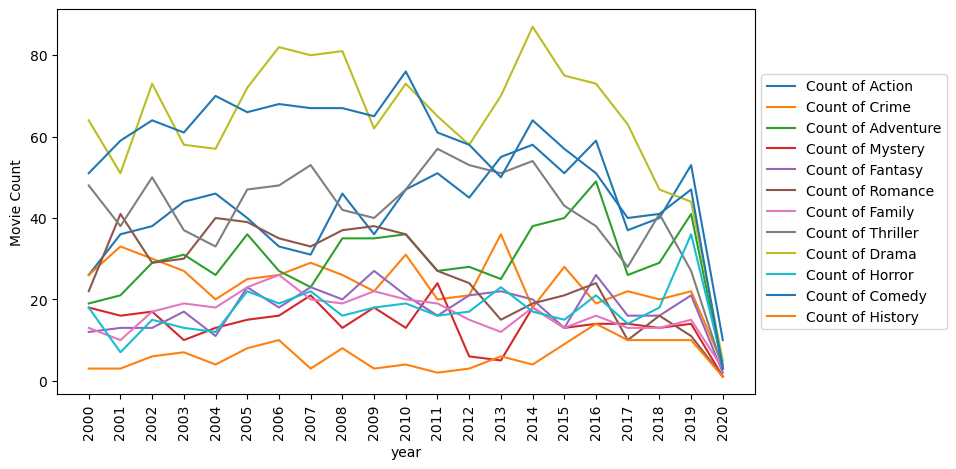

In [54]:
count_cols = list(genre_count_df.loc[:, genre_count_df.columns != 'year'])
ax1 = genre_count_df.plot.line(x="year", y=count_cols, figsize=(9,5))
ax1.set_xticks(genre_count_df["year"].values);
ax1.set_xticklabels(genre_count_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Movie Count')

**Analysis**
From the above chart we can see movie makers choose some genres more than other. We can see makers choose to make Drama and Action movie more. Count of History movie is mostly very less for all the years. 

In [55]:
runtime_bins = [0, 90, 120, 240]
length_labels = ["Short (<1.5hr)", "Medium (1.5-2hr)", "Long (>2hr)"]
movie_df["Length"] = pd.cut(movie_df["Runtime"], runtime_bins, labels=length_labels)
movie_df.head()

,Unnamed: 0,Revenue,Release Date,Runtime,Original Title,IMDB_ID,ID.1,Popularity,Vote Average,Budget,Genre List,Vote Count,Profit,Year,Length
0,0,429632142,2000-12-22,143,Cast Away,tt0162222,8358,50.864,7.656,90000000,"[['Adventure', 'Drama']]",10100,339632142,2000,Long (>2hr)
1,1,278019771,2000-07-07,88,Scary Movie,tt0175142,4247,134.378,6.324,19000000,[['Comedy']],6062,259019771,2000,Short (<1.5hr)
2,2,345823040,2000-11-15,104,How the Grinch Stole Christmas,tt0170016,8871,62.037,6.746,123000000,"[['Family', 'Comedy', 'Fantasy']]",6479,222823040,2000,Medium (1.5-2hr)
3,3,374111707,2000-12-15,127,What Women Want,tt0207201,3981,31.618,6.422,70000000,"[['Comedy', 'Romance']]",3463,304111707,2000,Long (>2hr)
4,4,330444045,2000-10-06,108,Meet the Parents,tt0212338,1597,26.050,6.669,55000000,"[['Comedy', 'Romance']]",5306,275444045,2000,Medium (1.5-2hr)


In [56]:
def find_runtime_profit(df, length):
    temp_df = df[df['Length'] == length]
    profit = temp_df.groupby("Year").agg({"Profit": "mean"})["Profit"]
    return profit.values
runtime_profit_df = pd.DataFrame({"year": range(2000, 2021)})
for length in length_labels:
    runtime_profit = find_runtime_profit(movie_df, length)
    if(len(runtime_profit)==21):
        runtime_profit_df[f"Profit in {length}"] = runtime_profit

runtime_profit_df

,year,Profit in Short (<1.5hr),Profit in Medium (1.5-2hr),Profit in Long (>2hr)
0,2000,4.868588e+07,2.929374e+07,8.694771e+07
1,2001,5.461686e+07,3.731988e+07,1.140778e+08
2,2002,5.361809e+07,3.401388e+07,1.537654e+08
3,2003,4.043370e+07,5.603680e+07,1.420707e+08
4,2004,3.815080e+07,6.051059e+07,1.255132e+08
5,2005,6.544640e+07,3.682442e+07,1.131321e+08
6,2006,3.579130e+07,4.822897e+07,1.104597e+08
7,2007,4.913599e+07,6.057121e+07,1.302947e+08
8,2008,7.182261e+07,5.758535e+07,1.431330e+08
9,2009,3.939980e+07,5.577706e+07,3.958723e+08


Text(0, 0.5, 'Profit (e8)')

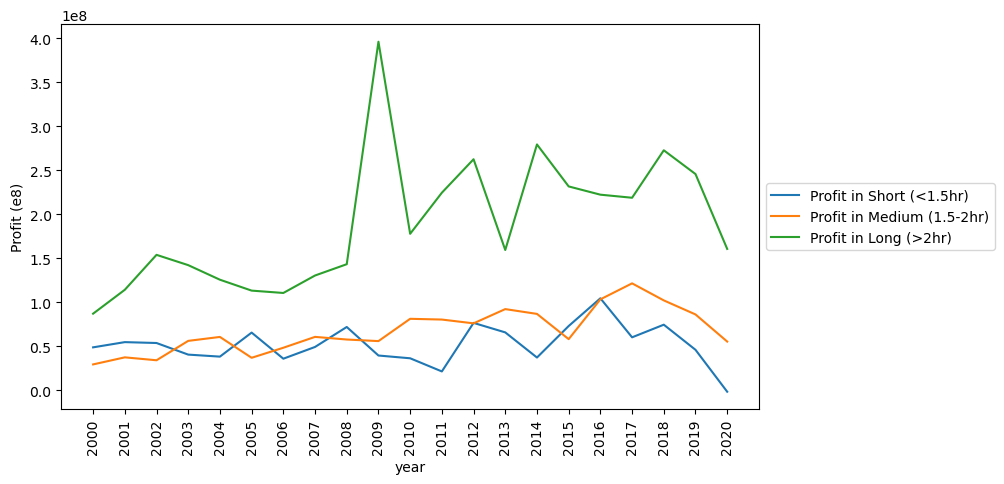

In [57]:
profit_cols = list(runtime_profit_df.loc[:, runtime_profit_df.columns != 'year'])
ax1 = runtime_profit_df.plot.line(x="year", y=profit_cols, figsize=(9,5))
ax1.set_xticks(runtime_profit_df["year"].values);
ax1.set_xticklabels(runtime_profit_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Profit (e8)')

In [ ]:
**Analysis**
From the above chart we can see an intesting fact. Thhough people getting for busy day by day, still a longer movie
always give a better profit than shorter ones